In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
# Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [ ]:
# Insert Missing Values
def insert_missing_values(df, missing_rate=0.1, seed=42):
    np.random.seed(seed)
    df_missing = df.copy()
    total_cells = df_missing.shape[0] * (df_missing.shape[1] - 1)
    total_missing = int(missing_rate * total_cells)

    for _ in range(total_missing):
        i = np.random.randint(0, df_missing.shape[0])
        j = np.random.randint(0, df_missing.shape[1] - 1)  # exclude target
        df_missing.iat[i, j] = np.nan
    return df_missing

df_missing = insert_missing_values(df, missing_rate=0.1)

In [24]:
# Separate features and target
features = df_missing.drop('target', axis=1)
target = df_missing['target']

# Impute missing values using mean
imputer = SimpleImputer(strategy='mean')
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
# Combine features and target again for visualization
df_plot = features_imputed.copy()
df_plot['target'] = target
df_plot['target'] = df_plot['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

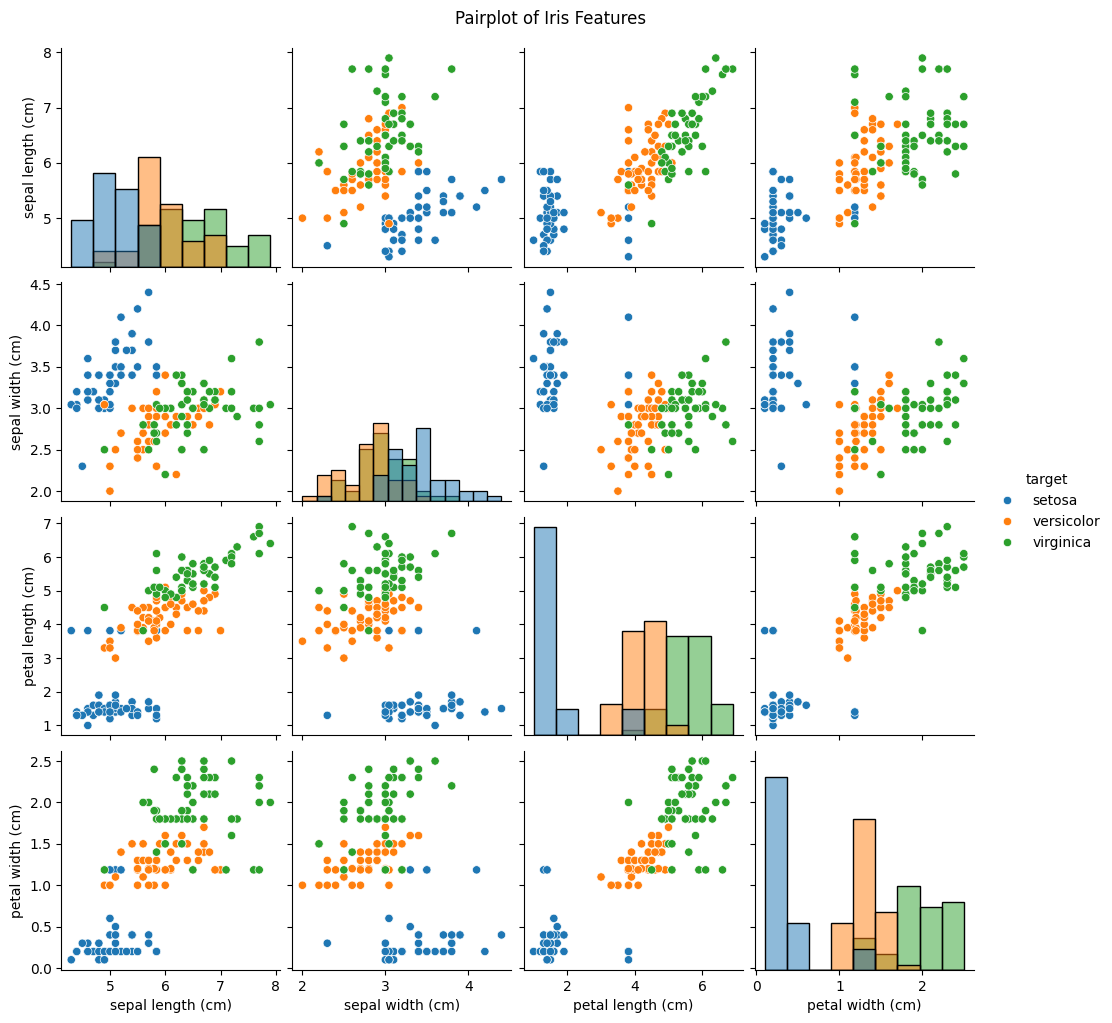

In [ ]:
sns.pairplot(df_plot, hue='target', diag_kind='hist')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

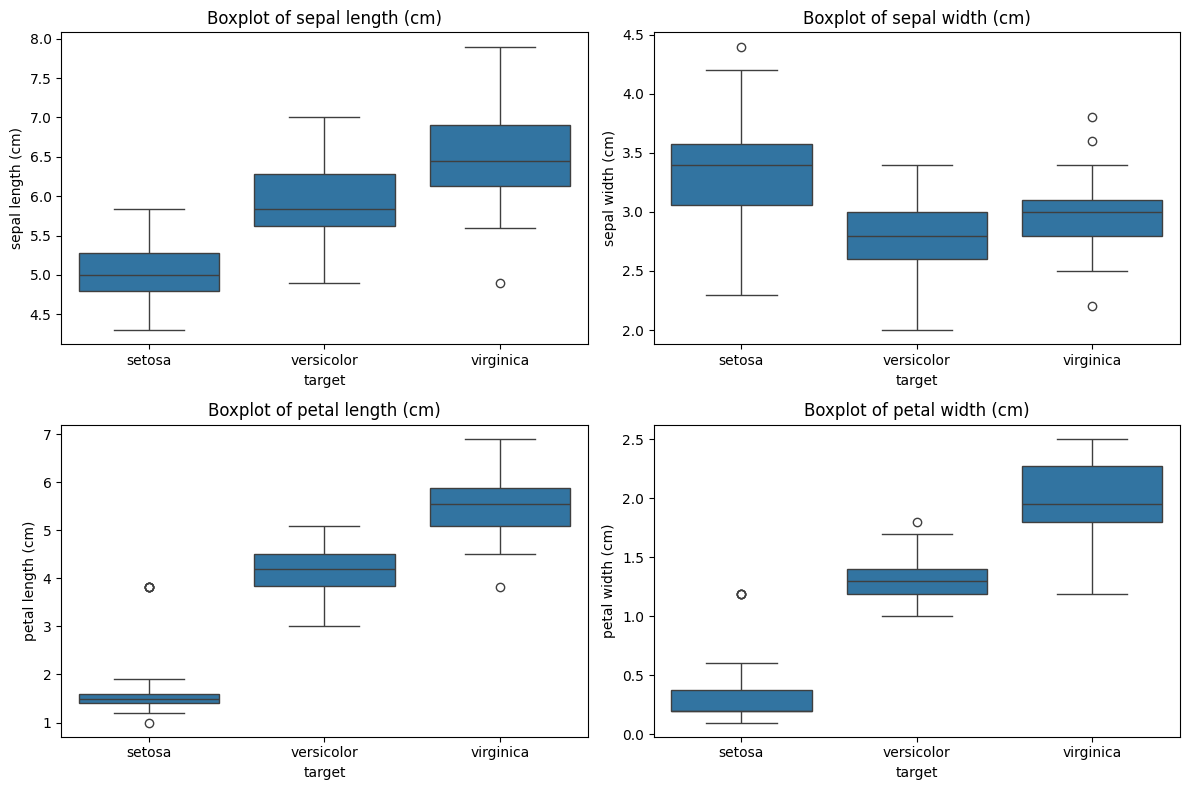

In [ ]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(features.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='target', y=column, data=df_plot)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

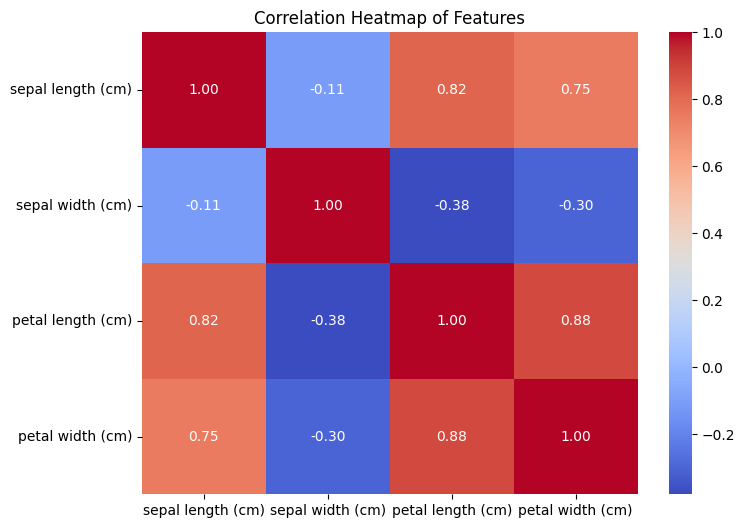

In [ ]:
plt.figure(figsize=(8, 6))
corr_matrix = features_imputed.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()